<a href="https://colab.research.google.com/github/tathi-martins/pos_eng_e_analise_de_dados/blob/main/Aluno_Estrategias_Treinamento_%26_Validacao_Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Grupo**

* Tathiana Martins - tsm2@cesar.school
* Bruno Santos - bfss@cesar.school
* Caio Guedes - ccsg@cesar.school
* Vandelson - vemf@cesar.school

# Estratégias de Treinamento - Exercício

## Importar bibliotecas
** Importe pandas, seaborn e as bibliotecas usuais. **

In [ ]:
!pip install -U scikit-learn # Update scikit-learn to the latest version

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

# Usando o algoritmo PCA para diminuir a dimensionalidade



1.   Gere uma base de dados com make_classification (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification)
4.   Faça a separação em treino e teste
5.   Utilize o algoritmo PCA https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA e gere mais dois conjuntos de dados com 10 e 5 features, além dos dados originais
6.   Treine modelos de k-NN com os dados originais e os transformados
6.   Analise os resultados


In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False,
)

# Divisão treino-teste

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.126584,-1.556869,-0.393826,-0.537029,0.244593,0.909225,-0.335435,-0.926489,0.030067,-1.041111,-1.894451,0.009549,-0.539616,0.335386,-0.610495,0.725847,-0.266054,-0.298323,0.981439,0.214337
1,-0.560851,0.007607,-1.250866,0.790119,-0.971438,2.171174,1.474813,2.019364,-0.887596,1.155326,1.903693,-1.628754,-1.335810,-0.057917,-0.558684,0.310031,0.812405,0.561879,0.550139,0.244694
2,-0.141132,-0.988946,1.703233,-1.191640,0.003872,0.052027,1.494709,0.266196,-0.594795,0.060193,2.255620,-0.780041,-1.034345,0.664241,0.161702,0.121052,0.278309,-1.236594,-0.747080,-0.397337
3,-0.751421,0.678175,-1.145951,-0.618201,-1.509645,0.453928,1.188726,1.441281,-1.256541,1.095307,-0.132422,0.088595,-0.069472,-0.083308,-1.232816,0.427011,0.882100,-1.373310,1.125968,-0.062110
4,-1.287418,-0.570223,1.944239,0.504160,1.469254,1.011170,0.698313,-0.430206,0.986950,0.343508,0.679335,-0.869308,-1.079720,1.243285,1.408410,0.094659,-0.417223,-0.898552,0.436590,-0.233951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1.259228,0.093750,-0.170545,-0.145614,-0.305567,0.022338,0.033837,-1.033990,1.670193,-2.631995,-0.652061,-0.482154,-0.042979,-0.776220,2.106576,-0.489806,-0.448134,-0.737414,1.242988,-0.399053
696,-0.167795,-1.064876,0.548325,0.739557,1.040714,-0.821612,-0.690663,0.323779,0.196112,1.045185,0.573334,0.426461,0.164445,-0.550351,-0.788338,0.347695,0.557746,-1.679785,-0.758403,0.297600
697,1.102762,1.617529,-0.137752,-1.836307,1.447674,-0.261039,-0.631118,0.814594,-0.400019,0.197014,-1.418650,1.246415,-0.612698,0.062948,-0.794200,-1.133524,0.515778,-0.076092,0.226114,0.516449
698,0.460563,0.304735,1.743974,-0.164564,-1.225236,-1.031973,-1.476970,-0.771503,-1.015393,1.572609,-1.094883,0.622019,0.214341,0.145393,0.699119,-0.303463,-0.375053,0.381186,-2.088375,0.004993


## Utilizando o algoritmo PCA

In [ ]:
from sklearn.decomposition import PCA

Com 10 features

In [ ]:
pca_10 = PCA(n_components=10)

In [ ]:
# Gerando os dados transformados com 10 e 5 componentes
X_train_pca_10 = pca_10.fit_transform(X_train)
X_test_pca_10 = pca_10.transform(X_test)

Com 5 features

In [ ]:
pca_5 = PCA(n_components=5)

In [ ]:
X_train_pca_5 = pca_5.fit_transform(X_train)
X_test_pca_5 = pca_5.transform(X_test)

## Treinando os modelos com todas as features, com 10 e 5 do PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

Todas as features

In [ ]:
# Inicializando o modelo KNN
knn = KNeighborsClassifier()

In [ ]:
# Treinando e testando o modelo nos dados originais
knn.fit(X_train, y_train)
y_pred_original = knn.predict(X_test)

In [ ]:
accuracy_original = accuracy_score(y_test, y_pred_original)
# Exibindo os resultados
print(f"Accuracy nos dados originais: {accuracy_original}")

Accuracy nos dados originais: 0.8


Todas 10 features

In [ ]:
# Treinando e testando o modelo nos dados transformados com 10 componentes
knn.fit(X_train_pca_10, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_pca_10 = knn.predict(X_test_pca_10)

In [ ]:
accuracy_pca_10 = accuracy_score(y_test, y_pred_pca_10)
print(f"Accuracy com 10 componentes PCA: {accuracy_pca_10}")

Accuracy com 10 componentes PCA: 0.79


Todas 5 features

In [ ]:
# Treinando e testando o modelo nos dados transformados com 5 componentes
knn.fit(X_train_pca_5, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_pca_5 = knn.predict(X_test_pca_5)

In [ ]:
accuracy_pca_5 = accuracy_score(y_test, y_pred_pca_5)
print(f"Accuracy com 5 componentes PCA: {accuracy_pca_5}")

Accuracy com 5 componentes PCA: 0.8166666666666667


## Analisando os resultados dos experimentos

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay, accuracy_score

Com todas as features

<Figure size 1600x1200 with 0 Axes>

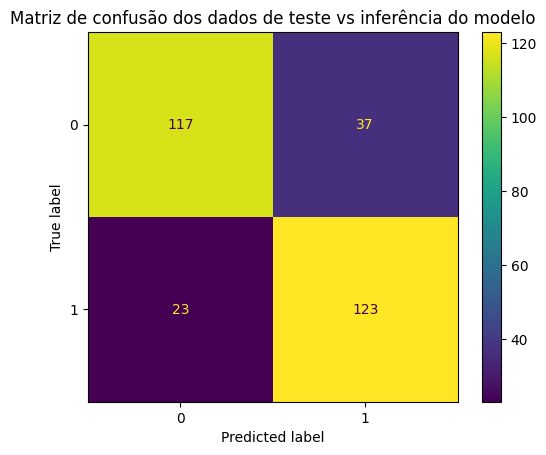

In [ ]:
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test, y_pred_original)
# Get the unique classes from y_test
classes = np.unique(y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=classes) # Use the unique classes as labels
cmd.plot()
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo")
plt.show()

**Matriz de confusão em porcentagem**

<Figure size 1600x1200 with 0 Axes>

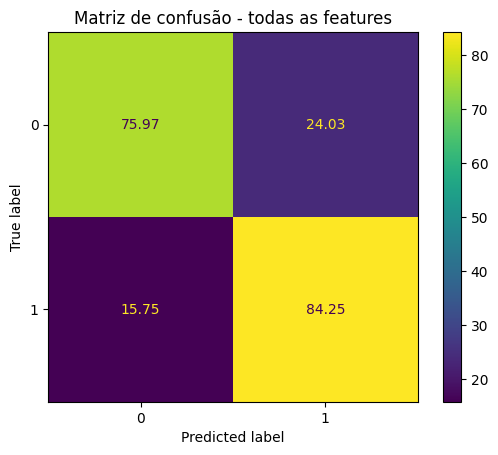

In [ ]:
# Percentual
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test, y_pred_original)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
cmd = ConfusionMatrixDisplay(cm_percent)
cmd.plot(values_format=".2f")
plt.title("Matriz de confusão - todas as features")
plt.show()

In [ ]:
# Gerando o relatório de classificação
print(classification_report(y_test, y_pred_original))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       154
           1       0.77      0.84      0.80       146

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



Com 10 features

<Figure size 1600x1200 with 0 Axes>

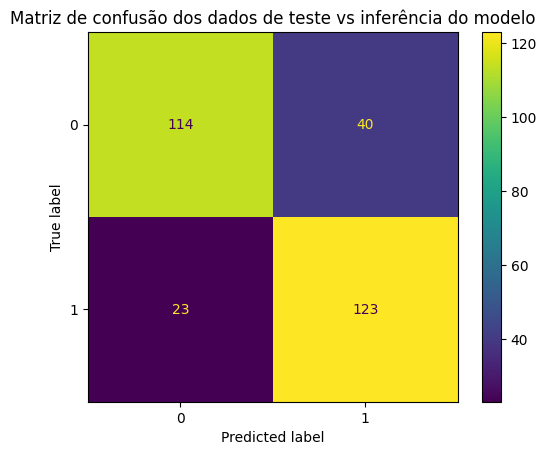

In [ ]:
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test, y_pred_pca_10)
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
cmd.plot()
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo")
plt.show()

**Matriz de confusão em porcentagem**

<Figure size 1600x1200 with 0 Axes>

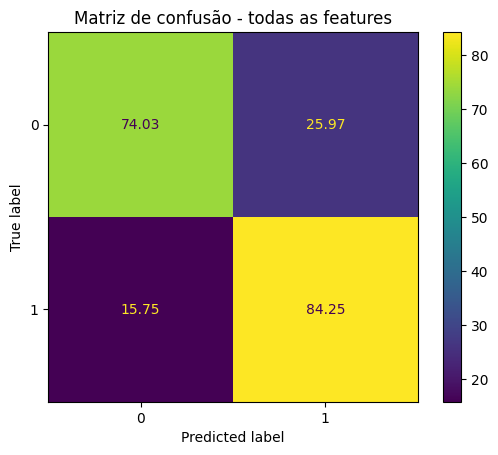

In [ ]:
# Percentual
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test, y_pred_pca_10)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
cmd = ConfusionMatrixDisplay(cm_percent)
cmd.plot(values_format=".2f")
plt.title("Matriz de confusão - todas as features")
plt.show()

In [ ]:
# Gerando o relatório de classificação
print(classification_report(y_test, y_pred_pca_10))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       154
           1       0.75      0.84      0.80       146

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



Com 5 features

<Figure size 1600x1200 with 0 Axes>

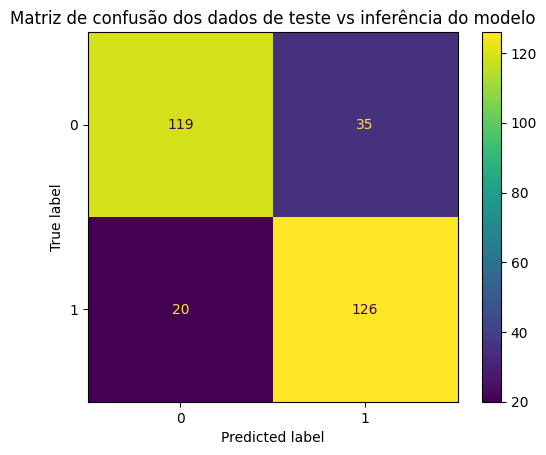

In [ ]:
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test, y_pred_pca_5)
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
cmd.plot()
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo")
plt.show()

**Matriz de confusão em porcentagem**

<Figure size 1600x1200 with 0 Axes>

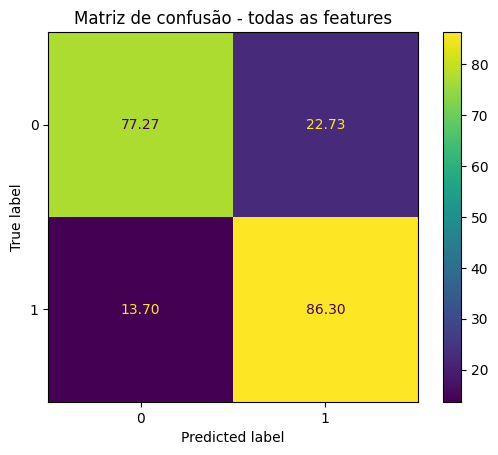

In [ ]:
# Percentual
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test, y_pred_pca_5)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
cmd = ConfusionMatrixDisplay(cm_percent)
cmd.plot(values_format=".2f")
plt.title("Matriz de confusão - todas as features")
plt.show()

In [ ]:
# Gerando o relatório de classificação
print(classification_report(y_test, y_pred_pca_5))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81       154
           1       0.78      0.86      0.82       146

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



# Obtenha os dados
** Leia o arquivo csv 'Arvore_Decisao_Iris_Data.csv' em um DataFrame **

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/tathi-martins/Dataframes/main/Iris.csv', sep=',')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df.drop(columns=['Id'], inplace=True)

In [ ]:
df.columns = columns

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**Convertendo o target em labels numérica**

Aplicaremos o método One-hot-encoder para transformar os dados categóricos em dados binários. Utilizaremos este método porque não existe uma ordem ou nível hieráquico entre as três classes, o que pode afetar o desempenho, criando um resultado enviesado no algoritmo K-NN que usa Distância Euclidiana para encontrar padrões.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# Inicializando o OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, dtype=int)

# Aplicando o encoder na coluna 'class'
encoded_data = encoder.fit_transform(df[['class']])

In [ ]:
# Convertendo para DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['class']))

# Concatenando com o DataFrame original
df_encoded = pd.concat([df, encoded_df], axis=1)

# Exibindo o DataFrame resultante
print(df_encoded.head())

   sepal_length  sepal_width  petal_length  petal_width        class  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   class_Iris-setosa  class_Iris-versicolor  class_Iris-virginica  
0                  1                      0                     0  
1                  1                      0                     0  
2                  1                      0                     0  
3                  1                      0                     0  
4                  1                      0                     0  


In [ ]:
df_encoded.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0


In [ ]:
df_encoded.describe()

,sepal_length,sepal_width,petal_length,petal_width,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,0.333333,0.333333,0.333333
std,0.828066,0.433594,1.764420,0.763161,0.472984,0.472984,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,0.000000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000,1.000000,1.000000


In [ ]:
df_encoded.drop(columns=['class'], inplace=True)
df_encoded.head()

,sepal_length,sepal_width,petal_length,petal_width,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


## Divisão treino-teste

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Separando as features (X) e os rótulos (y)
X_iris = df_encoded.drop(columns=['class_Iris-setosa', 'class_Iris-versicolor', 'class_Iris-virginica'])
y_iris = df_encoded[['class_Iris-setosa', 'class_Iris-versicolor', 'class_Iris-virginica']]

In [ ]:
# Dividindo o conjunto de dados em treino (70%) e teste (30%)
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.3, random_state=111)

# Verificando os tamanhos dos conjuntos de treino e teste
print("Tamanho do conjunto de treino:", X_train_iris.shape)
print("Tamanho do conjunto de teste:", X_test_iris.shape)

Tamanho do conjunto de treino: (105, 4)
Tamanho do conjunto de teste: (45, 4)


# Padronize as variáveis

Hora de para padronizar as variáveis.

Import StandardScaler do Scikit-learn.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Inicializando o normalizador
scaler = StandardScaler()

Converta as variáveis independentes com o StandardScaler

In [ ]:
# Ajusta o scaler apenas no X_train
X_train_scaled = scaler.fit_transform(X_train_iris)

Use o método .transform () para transformar os parâmetros em uma versão padronizada.

In [ ]:
# Aplica a normalização ajustado para X_train no X_test
X_test_scaled = scaler.transform(X_test_iris)

In [ ]:
# Verificando os dados normalizados
print(X_train_scaled[:5])  # Primeiras 5 linhas de X_train normalizado
print("\n")
print(X_test_scaled[:5])   # Primeiras 5 linhas de X_test normalizado

[[-0.38846387 -1.0285845   0.38804955  0.03412487]
 [ 1.34196609  0.14790104  0.67338011  0.4322484 ]
 [-0.51206601  0.85379237 -1.15273544 -1.29295353]
 [-0.88287243  1.7949808  -1.20980155 -1.29295353]
 [-0.14125959 -0.32269318  0.27391733  0.16683271]]


[[-0.88287243  0.85379237 -1.26686766 -1.29295353]
 [-1.00647457  0.85379237 -1.20980155 -1.02753785]
 [ 1.71277252  1.32438658  1.35817344  1.7593268 ]
 [ 0.60035325 -0.79328739  0.67338011  0.83037192]
 [ 1.09476181 -0.08739607  0.73044622  0.69766408]]


# Usando o algoritmo Random Forest como Feature Selection

Importe o RandomForestClassfier e SelectFromModel do scikit learn.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import time

In [ ]:
# Instanciando o RandomForest
rf = RandomForestClassifier(n_estimators=300, random_state=111)

In [ ]:
# Ajusta o modelo
rf.fit(X_train_scaled, y_train_iris)

# Exibe as importâncias das features
importances = rf.feature_importances_

In [ ]:
importances

array([0.08970906, 0.01487908, 0.41815363, 0.47725823])

**Importância de features com base na diminuição média na impureza**

A importância das features são fornecidas pelo atributo ajustado feature_importances_ e são computadas como a média e o desvio padrão do acúmulo da diminuição da impureza dentro de cada árvore.

**Aviso**

As importâncias do recurso com base na impureza podem ser enganosas para recursos de alta cardinalidade (muitos valores exclusivos). Veja Importância do recurso de permutação como uma alternativa abaixo.

In [ ]:
start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.047 seconds


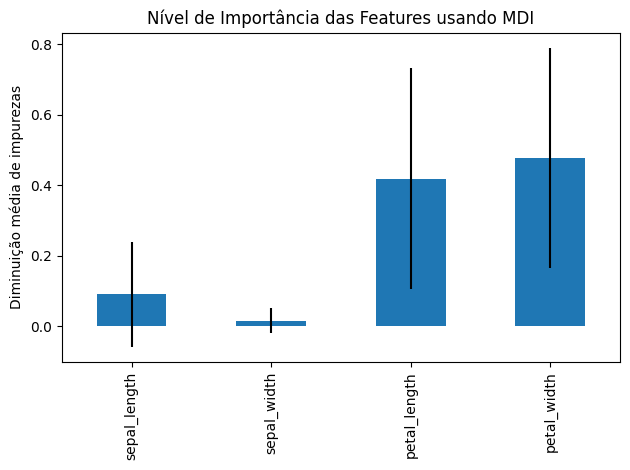

In [ ]:
forest_importances = pd.Series(importances, index=['sepal_length','sepal_width', 'petal_length', 'petal_width'])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title('Nível de Importância das Features usando MDI')
ax.set_ylabel('Diminuição média de impurezas')
fig.tight_layout()

**Importância de features com base na permutação**

Esta técnica supera as limitações da importância de features com base em impurezas: elas não têm um viés em relação às features de alta cardinalidade e podem ser computadas em um conjunto de teste externo.

O cálculo para importância de permutação é mais custoso. Os recursos são embaralhados n vezes e o modelo é reajustado para estimar sua importância.

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    rf, X_test_scaled, y_test_iris, n_repeats=10, random_state=111, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=['sepal_length','sepal_width', 'petal_length', 'petal_width'])

Elapsed time to compute the importances: 6.456 seconds


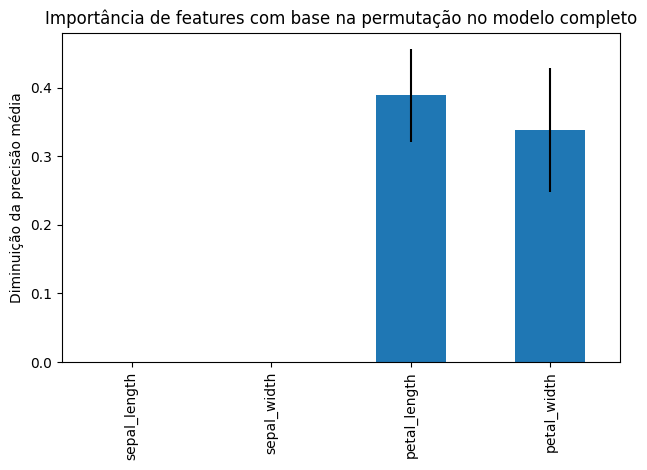

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title('Importância de features com base na permutação no modelo completo')
ax.set_ylabel('Diminuição da precisão média')
fig.tight_layout()
plt.show()

**Analisando a acurácia:**

In [ ]:
# Fazendo previsões no conjunto de teste
y_pred_iris = rf.predict(X_test_scaled)

# Calculando a acurácia
accuracy = accuracy_score(y_test_iris, y_pred_iris)
print(f"Acurácia: {accuracy:.4f}")

Acurácia: 0.9333


Referência: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

## Utilizando e analisando feature selection do modelo Random Forest via SelectFromModel

In [ ]:
# Seleciona as features mais importantes com base em um threshold
selector = SelectFromModel(rf, threshold=0.02, prefit=True)
X_train_selected = selector.transform(X_train_scaled)

In [ ]:
# Exibe as features selecionadas
selected_features = X_train_iris.columns[(selector.get_support())]
print(selected_features)

Index(['sepal_length', 'petal_length', 'petal_width'], dtype='object')


In [ ]:
#selected_features = X_train_iris.columns[selector.get_support()]
#X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features)

In [ ]:
# Aplicar a mesma transformação no conjunto de teste para garantir
# que ambos tenhas as mesmas features e não haja vazamento de dados do X_test para o modelo
X_test_selected = selector.transform(X_test_scaled)
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features)

In [ ]:
X_test_selected.head()

,sepal_length,petal_length,petal_width
0,-0.882872,-1.266868,-1.292954
1,-1.006475,-1.209802,-1.027538
2,1.712773,1.358173,1.759327
3,0.600353,0.673380,0.830372
4,1.094762,0.730446,0.697664


Ambos os métodos (SelectFromModel e o RandomForest com MDI) selecionaram as mesmas features como as melhores para treinar o modelo, são elas: 'sepal_length', 'petal_length', 'petal_width'.

Enquanto que o RandomForestClassifier com permutação selecionou apenas 'petal_length', 'petal_width'

## Validação Cruzada com k-NN

### Aplique a validação cruzada para as bases de dados utilizadas neste exercício

Utilize o conjunto de dados com todas as features gerados a partir do sklearn. Primeira parte dos exercícios.

In [ ]:
from sklearn.model_selection import cross_val_score
#from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, ConfusionMatrixDisplay

#### Dados **gerados com a função do sklearn**

Usando os dados originais

Text(0, 0.5, 'Score Rate')

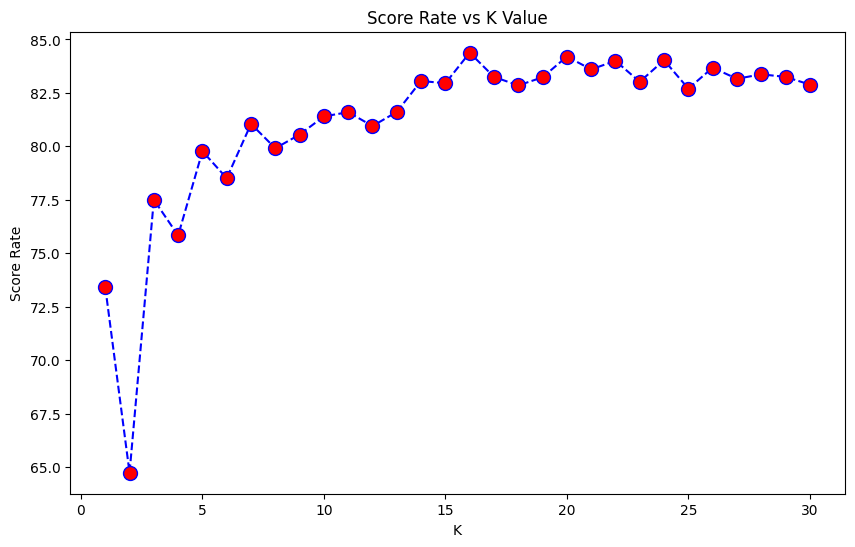

In [ ]:
score = []

# Definir os valores de n_neighbors que serão testados
#k_values = list(range(1, 31))

for i in range(1,31):
  #model
  knn = KNeighborsClassifier(n_neighbors=i)

  #cross validation
  cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='f1')

  score.append(round((cv_scores.mean()*100), 2))

plt.figure(figsize=(10,6))
plt.plot(range(1,31), score, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)
plt.title('Score Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Score Rate')

Usando os dados aplicados ao PCA 5 que teve um score superior ao dos dados originais e PCA 10

Text(0, 0.5, 'Score Rate')

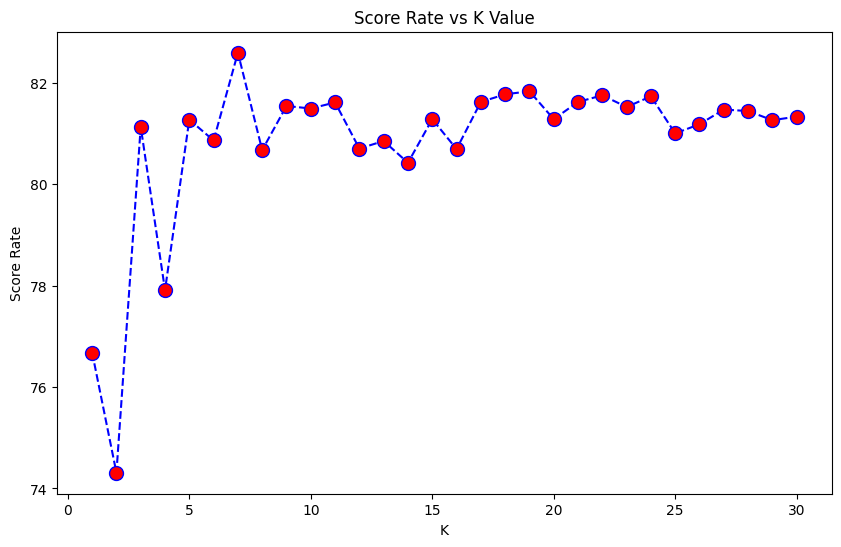

In [ ]:
score = []

# Definir os valores de n_neighbors que serão testados
#k_values = list(range(1, 31))

for i in range(1,31):
  #model
  knn = KNeighborsClassifier(n_neighbors=i)

  #cross validation
  cv_scores = cross_val_score(knn, X_train_pca_5, y_train, cv=5, scoring='f1')

  score.append(round((cv_scores.mean()*100), 2))

plt.figure(figsize=(10,6))
plt.plot(range(1,31), score, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)
plt.title('Score Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Score Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, y_train)
y_pred_original = knn.predict(X_test)


# Gerando o relatório de classificação (dados originais)
print(classification_report(y_test, y_pred_original))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       154
           1       0.82      0.86      0.84       146

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_pca_5, y_train)
y_pred_pca_5 = knn.predict(X_test_pca_5)

# Gerando o relatório de classificação (PCA 5)
print(classification_report(y_test, y_pred_pca_5))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       154
           1       0.77      0.84      0.80       146

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



<Figure size 1600x1200 with 0 Axes>

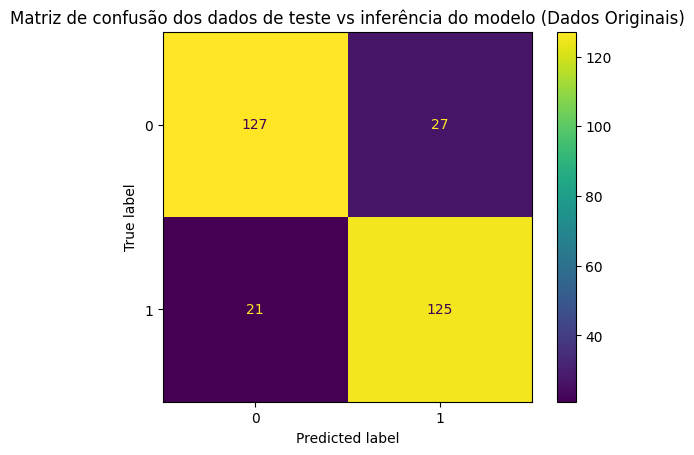

In [ ]:
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test, y_pred_original)
# Get the unique classes from y_test
classes = np.unique(y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=classes) # Use the unique classes as labels
cmd.plot()
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo (Dados Originais)")
plt.show()

<Figure size 1600x1200 with 0 Axes>

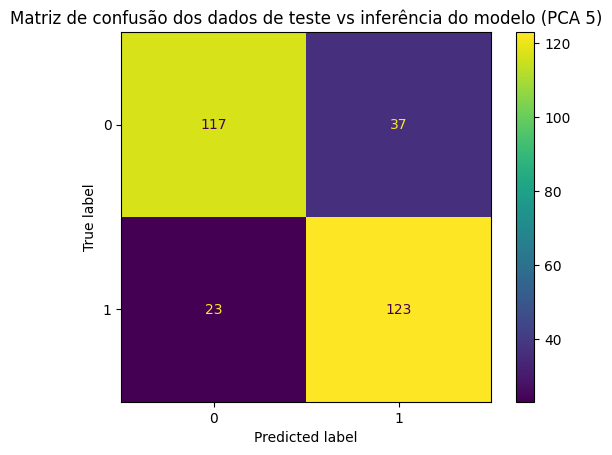

In [ ]:
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test, y_pred_pca_5)
# Get the unique classes from y_test
classes = np.unique(y_test)
cmd = ConfusionMatrixDisplay(cm, display_labels=classes) # Use the unique classes as labels
cmd.plot()
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo (PCA 5)")
plt.show()

O desempenho dos dois estão bem similares, embora o modelo usando os dados originais esteja ligeiramente melhor, o modelo usando o método PCA 5 consegue uma performance de 80% usando menos dados.

Observando a matriz de confusão do modelo usando PCA 5 ele acertou mais a classe 1 do que a 0, o que é curioso, por que a classe 0 possui mais amostras.

Enquanto que no modelo usando dados originais a assertividade para as duas classes foram idênticas mesmo contendo as mesmas proporções de amostras do modelo PCA 5 (154 para a classe 0 e 146 para a classe 1).

Uma possível explicação para isso:

* O modelo com PCA está performando bem porque conseguiu reduzir o ruído e simplificar a estrutura dos dados, mantendo boa parte da variância.

* A diferença no desempenho pode ser explicada pela maneira como as classes são projetadas no novo espaço PCA, onde a classe 1 ficou melhor separada do que a classe 0.

* O modelo com os dados originais tem mais detalhes, o que o ajuda a identificar ambas as classes com maior precisão, mas pode ser menos eficiente e mais propenso a overfitting.

* A escolha entre usar PCA ou não depende de fatores como a necessidade de simplificação, performance computacional, e o trade-off entre precisão e eficiência.

# Dados **Iris**

Ponto extra

In [ ]:
from sklearn.model_selection import GridSearchCV

* 'macro': Calcula a média do F1-score por classe, sem levar em conta o desequilíbrio entre as classes.

* 'micro': Calcula as métricas globais somando os verdadeiros positivos, falsos positivos e falsos negativos para encontrar um F1-score único.

* 'weighted': Calcula o F1 ponderado por classe, levando em conta o suporte (quantidade de amostras em cada classe).

* 'samples': Para problemas multilabel, calcula o F1 por amostra.

## **Selecionando as melhores features**

A ferramenta GridSearch do Scikit-Learn permite a busca pelas melhores combinações de hiperparâmetros para um determinado algoritmo, contribuindo para a melhoria da performance dos modelos. Ele é usado para automatizar o processo de ajuste dos parâmetros de um algoritmo, pois ele fará de maneira sistemática diversas combinações dos parâmetros e depois avalia os melhores de acordo com uma determinada métrica no parâmetro 'refit'.

### **Aplicando o Gridsearch para encontrar os melhores parâmetros, usando todas as features**

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Melhor número de vizinhos: 3
Melhor opção de weights: distance
Melhor opção de metric: euclidean
Melhor opção de p: 1
Melhor opção de algorithm: auto
Melhor F1 (weighted) score: 0.9714954051796155


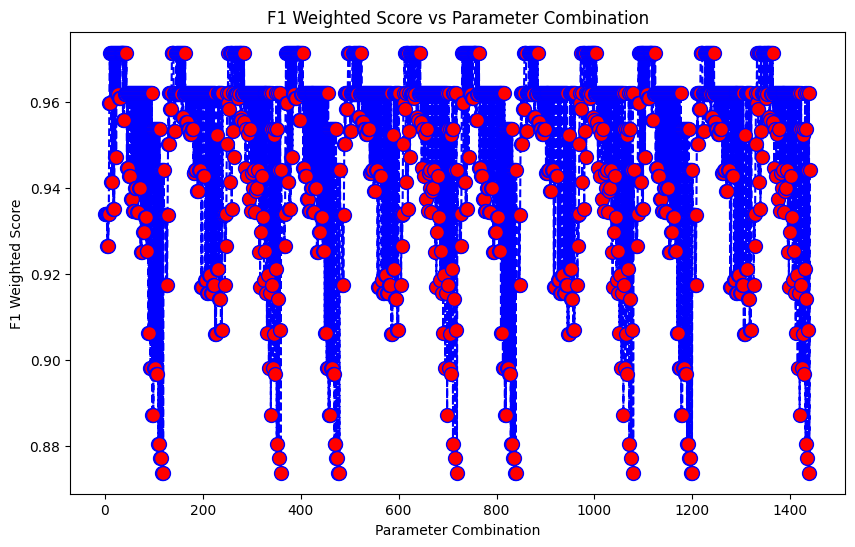

In [ ]:
# Definindo múltiplas métricas para o GridSearchCV
scoring = {
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'f1_weighted': 'f1_weighted'
}

# Configuração do GridSearchCV para o KNeighborsClassifier
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2],  # Usado para a métrica Minkowski
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Configurar o GridSearchCV com f1_weighted como refit
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring=scoring,
    refit='f1_weighted',  # Escolher o melhor modelo com base no f1_weighted
    n_jobs=-1,
    cv=5,
    return_train_score=True
)

# Ajustar o GridSearch no conjunto de treino
gs.fit(X_train_scaled, y_train_iris)

# Obter os resultados
results = gs.cv_results_

# Melhor parâmetro e melhor score
print(f"Melhor número de vizinhos: {gs.best_params_['n_neighbors']}")
print(f"Melhor opção de weights: {gs.best_params_['weights']}")
print(f"Melhor opção de metric: {gs.best_params_['metric']}")
print(f"Melhor opção de p: {gs.best_params_['p']}")
print(f"Melhor opção de algorithm: {gs.best_params_['algorithm']}")
print(f"Melhor F1 (weighted) score: {gs.best_score_}")

# Gráfico dos resultados
mean_test_scores = results['mean_test_f1_weighted']

# Calculate the number of parameter combinations
num_param_combinations = len(results['params'])

plt.figure(figsize=(10,6))
# Use num_param_combinations to generate the x-axis values
plt.plot(range(1, num_param_combinations + 1), mean_test_scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('F1 Weighted Score vs Parameter Combination')
plt.xlabel('Parameter Combination')
plt.ylabel('F1 Weighted Score')
plt.show()

### **Aplicando o Gridsearch para encontrar os melhores parâmetros usando as features selecionadas pelo SelectFromModel ('sepal_length', 'petal_length', 'petal_width').**

Melhor número de vizinhos: 7
Melhor opção de weights: uniform
Melhor opção de metric: euclidean
Melhor opção de p: 1
Melhor opção de algorithm: auto
Melhor F1 (weighted) score: 0.97083522297808


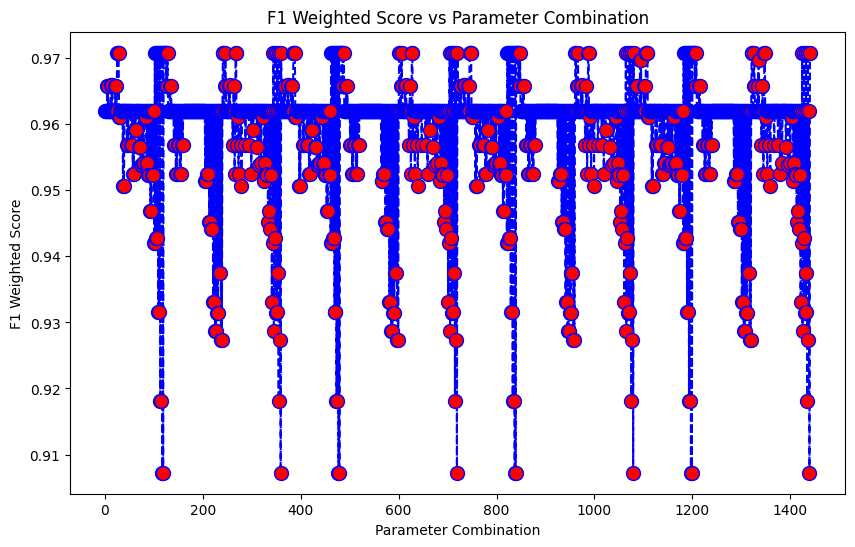

In [ ]:
# Definindo múltiplas métricas para o GridSearchCV
scoring = {
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'f1_weighted': 'f1_weighted'
}

# Configuração do GridSearchCV para o KNeighborsClassifier
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2],  # Usado para a métrica Minkowski
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Configurar o GridSearchCV com f1_weighted como refit
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring=scoring,
    refit='f1_weighted',  # Escolher o melhor modelo com base no f1_weighted
    n_jobs=-1,
    cv=5,
    return_train_score=True
)

# Ajustar o GridSearch no conjunto de treino
gs.fit(X_train_selected, y_train_iris)

# Obter os resultados
results = gs.cv_results_

# Melhor parâmetro e melhor score
print(f"Melhor número de vizinhos: {gs.best_params_['n_neighbors']}")
print(f"Melhor opção de weights: {gs.best_params_['weights']}")
print(f"Melhor opção de metric: {gs.best_params_['metric']}")
print(f"Melhor opção de p: {gs.best_params_['p']}")
print(f"Melhor opção de algorithm: {gs.best_params_['algorithm']}")
print(f"Melhor F1 (weighted) score: {gs.best_score_}")


# Gráfico dos resultados
mean_test_scores = results['mean_test_f1_weighted']

# Calculate the number of parameter combinations
num_param_combinations = len(results['params'])

plt.figure(figsize=(10,6))
# Use num_param_combinations to generate the x-axis values
plt.plot(range(1, num_param_combinations + 1), mean_test_scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('F1 Weighted Score vs Parameter Combination')
plt.xlabel('Parameter Combination')
plt.ylabel('F1 Weighted Score')
plt.show()

### **Aplicando o Gridsearch para encontrar os melhores parâmetros usando as features selecionadas pelo metodo RandomForestClassifier com base na permutação ('petal_length', 'petal_width').**

In [ ]:
X_train_selected_permuta = pd.DataFrame(X_train_selected, columns=selected_features)
X_train_selected_permuta.drop('sepal_length', axis=1, inplace=True)

In [ ]:
X_test_selected_permuta = pd.DataFrame(X_test_selected, columns=selected_features)
X_test_selected_permuta.drop('sepal_length', axis=1, inplace=True)

In [ ]:
X_train_selected_permuta

,petal_length,petal_width
0,0.388050,0.034125
1,0.673380,0.432248
2,-1.152735,-1.292954
3,-1.209802,-1.292954
4,0.273917,0.166833
...,...,...
100,0.445116,0.432248
101,-1.266868,-1.160246
102,0.559248,0.432248
103,1.186975,0.830372


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Melhor número de vizinhos: 1
Melhor opção de weights: uniform
Melhor opção de metric: euclidean
Melhor opção de p: 1
Melhor opção de algorithm: auto
Melhor F1 (weighted) score: 0.9814488602458527


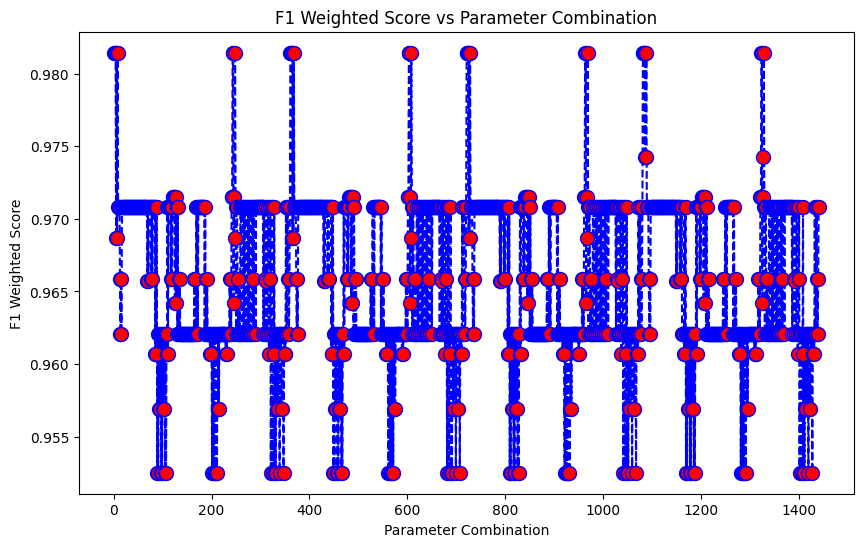

In [ ]:

# Definindo múltiplas métricas para o GridSearchCV
scoring = {
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'f1_weighted': 'f1_weighted'
}

# Configuração do GridSearchCV para o KNeighborsClassifier
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2],  # Usado para a métrica Minkowski
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Configurar o GridSearchCV com f1_weighted como refit
gs = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring=scoring,
    refit='f1_weighted',  # Escolher o melhor modelo com base no f1_weighted
    n_jobs=-1,
    cv=5,
    return_train_score=True
)

# Ajustar o GridSearch no conjunto de treino
gs.fit(X_train_selected_permuta.values, y_train_iris)

# Obter os resultados
results = gs.cv_results_

# Melhor parâmetro e melhor score
print(f"Melhor número de vizinhos: {gs.best_params_['n_neighbors']}")
print(f"Melhor opção de weights: {gs.best_params_['weights']}")
print(f"Melhor opção de metric: {gs.best_params_['metric']}")
print(f"Melhor opção de p: {gs.best_params_['p']}")
print(f"Melhor opção de algorithm: {gs.best_params_['algorithm']}")
print(f"Melhor F1 (weighted) score: {gs.best_score_}")

# Gráfico dos resultados
mean_test_scores = results['mean_test_f1_weighted']

# Calculate the number of parameter combinations
num_param_combinations = len(results['params'])

plt.figure(figsize=(10,6))
# Use num_param_combinations to generate the x-axis values
plt.plot(range(1, num_param_combinations + 1), mean_test_scores, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('F1 Weighted Score vs Parameter Combination')
plt.xlabel('Parameter Combination')
plt.ylabel('F1 Weighted Score')
plt.show()

Os melhores parâmetros escolhidos pelo GridSearch são basicamente os mesmos, com pouquíssimas diferenças entre as diferentes features.

## **Aplicando os modelos**

### **Aplicando o Gridsearch para encontrar os melhores parâmetros, usando todas as features**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean', p=1, algorithm='auto')
knn.fit(X_train_scaled, y_train_iris)
y_pred = knn.predict(X_test_scaled)

# Gerando o relatório de classificação (dados originais)
print(classification_report(y_test_iris, y_pred_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      0.87      0.90        15
           2       0.88      0.94      0.91        16

   micro avg       0.93      0.93      0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45
 samples avg       0.93      0.93      0.93        45



### **Aplicando o Gridsearch para encontrar os melhores parâmetros usando as features selecionadas pelo SelectFromModel ('sepal_length', 'petal_length', 'petal_width').**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7, weights='uniform', metric='euclidean', p=1, algorithm='auto')
knn.fit(X_train_selected, y_train_iris)
y_pred_original = knn.predict(X_test_selected)

# Gerando o relatório de classificação (dados originais)
print(classification_report(y_test_iris, y_pred_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      0.87      0.90        15
           2       0.88      0.94      0.91        16

   micro avg       0.93      0.93      0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45
 samples avg       0.93      0.93      0.93        45



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


### **Aplicando o Gridsearch para encontrar os melhores parâmetros usando as features selecionadas pelo metodo RandomForestClassifier com base na permutação ('petal_length', 'petal_width').**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean', p=1, algorithm='auto')
knn.fit(X_train_selected_permuta, y_train_iris)
y_pred_original = knn.predict(X_test_selected_permuta)


# Gerando o relatório de classificação (dados originais)
print(classification_report(y_test_iris, y_pred_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.93      0.87      0.90        15
           2       0.88      0.94      0.91        16

   micro avg       0.93      0.93      0.93        45
   macro avg       0.94      0.93      0.94        45
weighted avg       0.93      0.93      0.93        45
 samples avg       0.93      0.93      0.93        45



Como as métricas dos modelos estão todos acima de 90%, o modelo escolhido foi o primeiro, o que usa todas as features. Escolhemos ele porque usa um número equilibrado de K (k=3), nem muito pouco como o k=1, o que o torna mais propenso a overfitting, nem muito alto (k=7) o que aumenta o risco para underfitting. Portanto o k=3 é o ideal, apesar de usar mais features do que os outros

## **Analisando os resultados**

<Figure size 1600x1200 with 0 Axes>

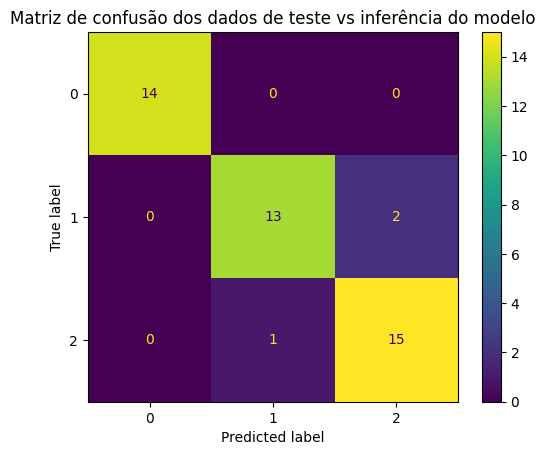

In [ ]:
y_test_iris_single = pd.Series(np.argmax(y_test_iris.values, axis=1))
y_pred_iris_single = pd.Series(np.argmax(y_pred_iris, axis=1))

plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test_iris_single, y_pred_iris_single) # Usa o label no formato array único

# Obtem o classe única do y_test
classes = np.unique(y_test_iris_single) # Usa o label no formato array único
cmd = ConfusionMatrixDisplay(cm, display_labels=classes) # Usa o label no formato array único
cmd.plot()
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo")
plt.show()

**Matriz de confusão em porcentagem**

<Figure size 1600x1200 with 0 Axes>

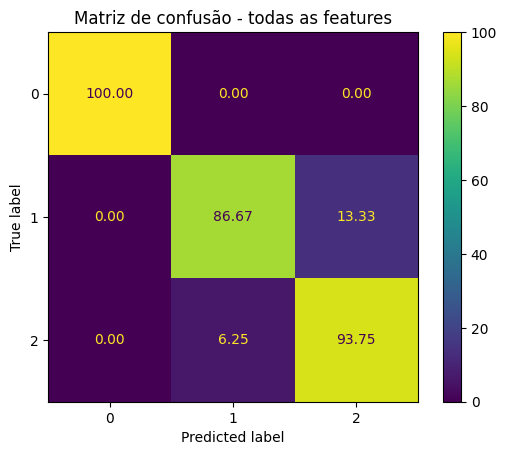

In [ ]:
# Percentual
# Converte y_test_iris para array simples
y_test_iris_single = pd.Series(np.argmax(y_test_iris.values, axis=1)).to_numpy()

# Converte y_test_iris para array simples
y_pred_iris_single = pd.Series(np.argmax(y_pred_iris, axis=1)).to_numpy()

plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test_iris_single, y_pred_iris_single) # Usa o label no formato array único para ambos
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
cmd = ConfusionMatrixDisplay(cm_percent)
cmd.plot(values_format=".2f")
plt.title("Matriz de confusão - todas as features")
plt.show()

## Conclusão

Descreva o que você identificou como melhoria ou não da utilização das abordagens do PC, feature selection e Cross Validation.

- A utilização do PCA ajuda a evitar o overfitting, já que conseguimos ter um desempenho melhor do modelo utilizando uma quantidade menor de dados, sem perder a representação original dos mesmos. Apesar disso, pudemos observar que a redução da dimensionalidade não impactou positivamente na acurácia do modelo, que caiu de 84% para 80% com a aplicação do PCA 5 para o dataset com os dados artificiais.

- O cross validation nos ajudou a verificar se a utilização de processos de redução de dimensionalidade, feature selection e padronização de variáveis em relação ao modelo original aumentariam a acurácia do modelo. Como resultado, pudemos ver que a acurácia final foi maior utilizando os dados originais no lugar do PCA.

- O feature selection nos ajuda a escolher as features mais importantes para o conjunto de dados, onde podemos focar os esforços de treino nelas para maximizar a assertividade do modelo. Ao utilizar SelectFromModel, RandomForest com MDI e o RandomForestClassifier com permutação, pudemos ver que a feature *sepal_width* não era uma feature tão importante para o treinamento do modelo (caso levemos em consideração a intersecção da classificação de importância das features), o que pode ser levado como critério para retreinar o modelo em busca de uma melhor acurácia.

- Também aplicamos o GridSearch para ajustar os hiperparâmetros para escolher os melhores de acordo com as features escolhidas. No final, o desempenho dos modelos foi muito semelhante independente das features usadas. O modelo final que consideramos como o melhor foi o que utiliza todas as features e com k=3. K=3 é a melhor escolha de k, porque proporciona o melhor equilíbrio entre viés e variância, ou seja, um bom desempenho em dados novos não vistos.